<a href="https://colab.research.google.com/github/EgorVoron/QueueFunc/blob/master/queue_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Функция неотрицательной очереди**

In [0]:
import math
from scipy.integrate import quad

**"Выравнивающая" функция**

$$R\left(x\right)=\max\left(0,\ x\right)$$

In [0]:
def R(x):
    return max(0, x)

**Функции f() и n() для примера**

f(t) - общее кол-во запросов в данный момент t  
n(t) - производительность в данный момент t

In [0]:
def f(t):
    """общее кол-во запросов в данный момент"""
    return ((t/5-1)**3+1)*5

In [0]:
def n(t):
    """производительность в данный момент"""
    return math.sin(5*t)/5+1

**Прирост очереди**

$$\frac{d}{dt}q\left(t_{1}\right)=R\left(\frac{d}{dt}f\left(t_{1}\right)-n\left(t_{1}\right)\right)$$

решая данное дифференциальное уравнение для действительных $$t_1 \geqslant	 0$$ получаем

**Функция очереди**

$$q\left(t_{1}\right)=R\left(f\left(t_{1}\right)-\int_{0}^{t_{1}}n\left(t\right)dt\right)$$

Для наиболее "реалистичного" случая длина очереди должна быть целой (при этом интеграл производительности можеть быть и дробным), поэтому следует брать целую часть значения функции очереди. $$q\left(t_{1}\right)=\lfloor(R\left(f\left(t_{1}\right)-\int_{0}^{t_{1}}n\left(t\right)dt\right)\rfloor$$

В коде рассмотрен случай неотрицательной действительной очереди

In [0]:
def q(t):
    """длина очереди"""
    return R(f(t) - quad(n, 0, t)[0])

**График**

In [0]:
import matplotlib.pyplot as plt

In [0]:
def get_data(f, x_min, x_max, num):
    x_list, y_list = [], []
    dx = (x_max-x_min)/num
    i = x_min
    while i <= x_max:
        x_list.append(i)
        y_list.append(f(i))
        i += dx
    return x_list, y_list

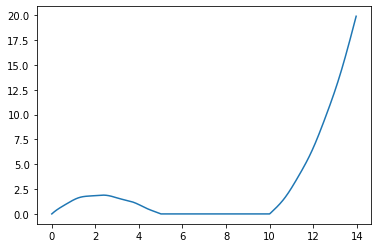

In [8]:
plt.plot(*get_data(q, 0, 14, 500))
plt.show()

# **Общий случай очереди рациональной длины**

Длина такой очереди может принимать любые действительные значения

**Прирост очереди**

$$\frac{d}{dt}q\left(t_{1}\right)=\frac{d}{dt}f\left(t_{1}\right)-n\left(t_{1}\right)$$

**Функция очереди рациональной длины**

$$q\left(t_{1}\right)=f\left(t_{1}\right)-\int_{0}^{t_{1}}n\left(t\right)dt$$

In [0]:
def q_real(t):
    """длина очереди"""
    return f(t) - quad(n, 0, t)[0]

**Очередь, накопившаяся с момента t_0 по момент t_1**

$$q\left(t_{0,\ }t_{1}\right)=f\left(t_{1}\right)-f\left(t_{0}\right)-\int_{t_{0}}^{t_{1}}n\left(t\right)dt$$

**График**

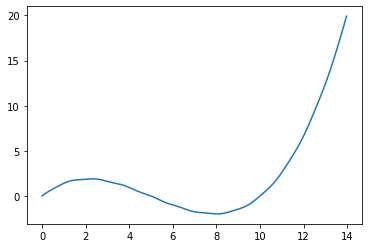

In [11]:
plt.plot(*get_data(q_real, 0, 14, 500))
plt.show()